# Analyzing the Dynamisc of tfSFH

In this notebook we take a look into the dynamics of tfSFH, that is, SF implemented in *tensor flow* and optimized via *entropy minimization*.

## Setup

We start by importing some libraries:

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm

import tfSF, tfSFH
import npSF

We define the parameters of our simulation:

In [2]:
n_simulations = 1

original_features = 2
learned_features = 2
IT_bins = 30
sigma2 = 1./32

n_samples = 5
n_epochs = 100

maxX = 5
minX = -5   

We also define some graphical parameters for plotting

In [3]:
from IPython.display import display, clear_output

colors = ['r','g','b','c','y']
markers = ['*', 'o', '^', 's', 'D']
z = range(n_samples)
dotsize = 25
refreshFrequency = 0.05

## Running the simulation

We generate some sample data

In [4]:
X = (minX-maxX) * np.random.rand(n_samples,original_features) + maxX

We instantiate and we train a tfSFH module

In [5]:
sf = tfSFH.SFilterH(n_features=learned_features, bins=IT_bins, bandwidth=sigma2)
sf.fit(X,epochs=n_epochs)

Epoch 1/100
1/1 [==============================] - 0s 9ms/step - loss: 3.2589
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 3.0018
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 2.9322
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 2.9538
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 2.9733
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 2.9773
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 2.9723
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 2.9639
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 2.9551
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 2.9475
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 2.9418
Epoch 12/100
1/1 [==============================] - 0s 2ms/step - loss: 2.9379
Epoch 13/100
1/1 [==============================] - 0s 2ms/st

## Dynamics of the learned representations

We now want observe how the learned representations change during the learning process.

To do this, we extract the weights we learned at each iteration.

In [6]:
Ws = sf.weights

We then define a helper function to compute the tfSFH learned representation as a function of the weights. Notice that here, for simplicity, we call the steps of SF implemented using *numpy*; since no learning is now required, using *numpy* saves us the overhead of instantiating a *tensorflow* model.

In [7]:
def computeZ(X,W):
    WX = np.dot(W,X.T)
    F = npSF.softabsolute(WX)
    Fsquish, _ = npSF.l2row(F)
    Fhat, _ = npSF.l2row(Fsquish.T)
    Z = Fhat.T
    return Z

Finally we plot the learned representations epoch by epoch.

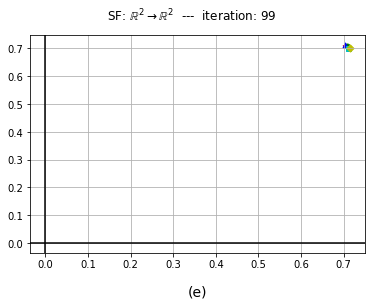

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 

for i in range(n_epochs):
    
    fig.suptitle(r"SF: $\mathbb{R}^{2}\rightarrow\mathbb{R}^{2}$  ---  iteration: "+ str(i))
    Z = computeZ(X,Ws[i])
    
    for x,y,c,m in zip(Z[0],Z[1],colors,markers):
        ax.scatter(x,y,s=dotsize,c=c,marker=m)
    ax.axhline(0,color='black')
    ax.axvline(0,color='black')
    ax.grid(True)
    ax.text(0.5, -0.18,'(e)', horizontalalignment='center', verticalalignment='center',transform=ax.transAxes, fontsize=14)
        
    display(fig)
    
    clear_output(wait = True)
    plt.pause(refreshFrequency)
    ax.cla()

These results already point out a substantially different behaviour of tfSF and tfSFH. Entropy minimization, indeed, stalls the learning very soon by clustering together all the data points onto a single point.

## Conclusions

- tfSFH behaves differently from tfSF

### References
[1] Zennaro, F.M. and Chen, K., 2018. Towards understanding sparse filtering: A theoretical perspective. Neural Networks, 98, pp.154-177.